## Import the necessary modules and libraries

In [14]:

import numpy as np               # For numerical function
import pandas as pd              #For Data Manupulation 
import datetime as dt             # For dealing with datetime dataypes
import calendar


# For plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(context="notebook", palette="deep", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

# For Modeling and accuracy 
from sklearn.model_selection import train_test_split     # For splitting data into train and test
from sklearn.linear_model import LinearRegression        # Linear Regression
from sklearn.metrics import mean_squared_error          # To calculate RMSE
from sklearn.ensemble import RandomForestRegressor     # Random forest 

## Import Data

In [15]:
df_train= pd.read_csv("D:/projects/Cab Fare Prediction/train_cab/train_cab.csv")
df_test= pd.read_csv("D:/projects/Cab Fare Prediction/test/test.csv")




In [16]:
df_train.head()
df_train.tail()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [17]:
df_test.shape

(9914, 6)

In [18]:
#df_train.info()


df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [19]:
df_train.loc[ df_train['fare_amount'] =="430-", 'fare_amount']= 430 
df_train["fare_amount"]= df_train["fare_amount"].astype("float")
df_train["passenger_count"]=df_train["passenger_count"].astype("O")





In [20]:
  df_train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


##### DATA SUmmary

In [21]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,16043.0,15.040871,430.459997,-3.000000,6.000000,8.500000,12.500000,54343.000000
pickup_longitude,16067.0,-72.462787,10.578384,-74.438233,-73.992156,-73.981698,-73.966838,40.766125
pickup_latitude,16067.0,39.914725,6.826587,-74.006893,40.734927,40.752603,40.767381,401.083332
dropoff_longitude,16067.0,-72.462328,10.575062,-74.429332,-73.991182,-73.980172,-73.963643,40.802437
dropoff_latitude,16067.0,39.897906,6.187087,-74.006377,40.734651,40.753567,40.768013,41.366138


In [22]:
df_train.describe(include= ["O"])

,pickup_datetime,passenger_count
count,16067,16012.0
unique,16021,27.0
top,2012-01-26 13:12:00 UTC,1.0
freq,2,11259.0


## Create year, Month, day feature from datetime 

In [23]:
# Convert pickup datetime from object type to datetime type

#df_train.loc[df_train["pickup_datetime"]== "43"]#= np.nan
df_train.drop(1327, axis= 0, inplace= True)

df_train["pickup_datetime"]= pd.to_datetime(df_train["pickup_datetime"], format= "%Y-%m-%d %H:%M:%S UTC")

In [24]:
# create date time and year feature

df_train["pickup_year"]= df_train.pickup_datetime.apply(lambda x: x.year)
df_train['pickup_day']=df_train['pickup_datetime'].apply(lambda x:x.day)
df_train["picup_day"]= df_train["pickup_datetime"].apply(lambda x: calendar. day_name[x.weekday()])
df_train["pickup_month"]= df_train["pickup_datetime"].apply(lambda x: x.month)

df_train["pickup_hour"]= df_train["pickup_datetime"].apply(lambda x: x.hour)

In [25]:
df_train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_day', 'picup_day', 'pickup_month',
       'pickup_hour'],
      dtype='object')

# Check anomalies in the dataset

## -->Missing value Analysis

In [26]:
df_train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
pickup_year           0
pickup_day            0
picup_day             0
pickup_month          0
pickup_hour           0
dtype: int64

In [27]:
df_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [28]:
df_train.fare_amount= df_train.fare_amount.fillna(df_train.fare_amount.median())
df_train.passenger_count= df_train.passenger_count.fillna(1)

# Outlier Analysis

fare_amount
12.5 6.0
-3.75 22.25


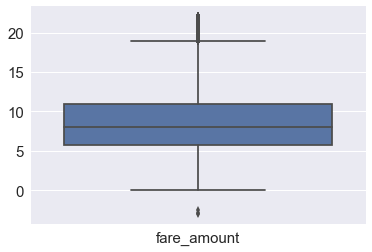

In [29]:
cname= ["fare_amount"]
for i in cname:
    print(i)

    
    q75, q25= np.percentile(df_train.loc[:, i], [75, 25])
    print(q75, q25)
    iqr= q75- q25
    min= q25- iqr*1.5
    max= q75+ iqr*1.5
    print(min, max)
    df_train= df_train.drop(df_train[df_train.loc[:, i] < min].index)
    df_train= df_train.drop(df_train[df_train.loc[:, i] > max].index)   
   





data= df_train.loc[:, ["fare_amount"]]
sns.boxplot(data=data)

In [30]:
#### There are few values in longitude and latitude variables since this data set is for newyork city taxi fare and Latitude and longitude coordinates are: 40.730610, -73.935242.


df_train[(df_train.pickup_latitude==0) | (df_train.pickup_longitude)==0 |
         (df_train.dropoff_latitude==0)|(df_train.dropoff_longitude==0)].shape

    

(280, 12)

# Exploratory data analysis

## Lets talk about fare amount i.e our target variable


In [31]:
#DRop the negative value

df_train[df_train.fare_amount < 0]
#df_train.drop([2039, 2486, 13032, 10002], axis=0, inplace= True)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_day,picup_day,pickup_month,pickup_hour
2039,-2.9,2010-03-09 23:37:10,-73.789450,40.643498,-73.788665,40.641952,1.0,2010,9,Tuesday,3,23
2486,-2.5,2015-03-22 05:14:27,-74.000031,40.720631,-73.999809,40.720539,1.0,2015,22,Sunday,3,5
13032,-3.0,2013-08-30 08:57:10,-73.995062,40.740755,-73.995885,40.741357,4.0,2013,30,Friday,8,8


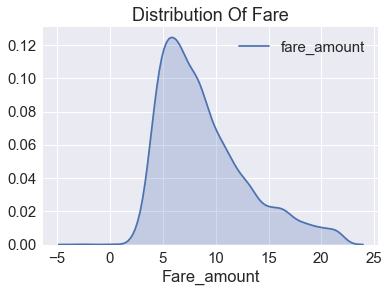

In [32]:
sns.kdeplot(df_train.fare_amount, shade= True)
plt.xlabel('Fare_amount');
plt.title('Distribution Of Fare');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,1,'Distribution Of Fare_amount(log_scale)')

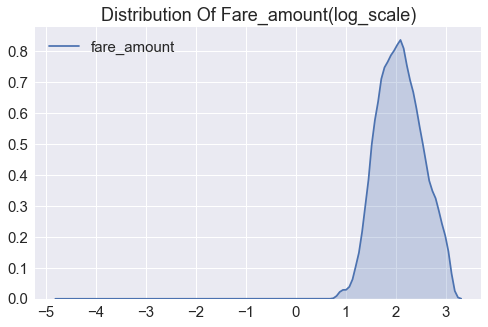

In [33]:
# Plot the log transformed fare amount
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_train.fare_amount), shade= True)
plt.title("Distribution Of Fare_amount(log_scale)")

In [34]:
df_train.columns


Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_day', 'picup_day', 'pickup_month',
       'pickup_hour'],
      dtype='object')

## Lets See which year having maximum number of trip

Text(0.5,1,' Pickup_Year V/S Avg Fare Amount')

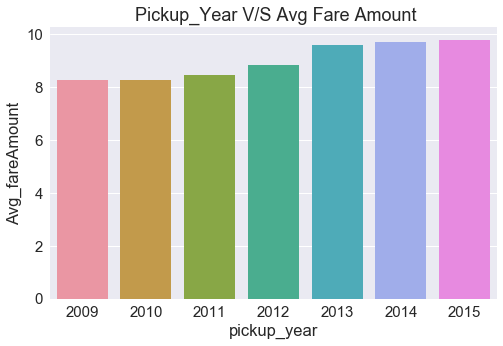

In [35]:
plt.figure(figsize= (8, 5)) 

pickupYear_FareAmout= df_train.groupby(["pickup_year"])["fare_amount"].mean().reset_index()
pickupYear_FareAmout= pickupYear_FareAmout.rename(columns= {"fare_amount": "Avg_fareAmount"})
sns.barplot(x= "pickup_year", y= "Avg_fareAmount", data= pickupYear_FareAmout)
plt.title(" Pickup_Year V/S Avg Fare Amount")






## Average Fare Amount is increasing over the years

Text(0.5,1,'Pickup_month V/S Avg fare Per month')

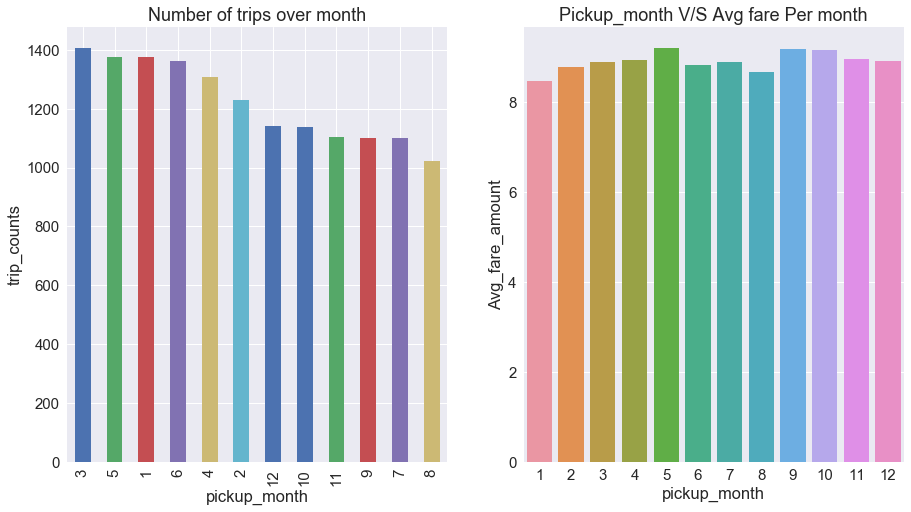

In [36]:
 plt.subplot(1,2,1)
df_train.pickup_month.value_counts().plot(kind= "bar", figsize= (15, 8))
plt.xlabel("pickup_month")
plt.ylabel("trip_counts")
plt.title("Number of trips over month")

plt.subplot(1,2,2)

avg_fare_month= df_train.groupby(["pickup_month"])["fare_amount"].mean().reset_index().rename(columns= {"fare_amount": "Avg_fare_amount"})
sns.barplot(x= "pickup_month", y= "Avg_fare_amount", data=avg_fare_month)
plt.title("Pickup_month V/S Avg fare Per month")



<font color='blue'>As We can see number of trips is higher in Jan to June after that the number of trips decreasing and avg fair amount is almost constant throughout the months</font>

###  Relationship B/W Day of the week and fare Amount

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

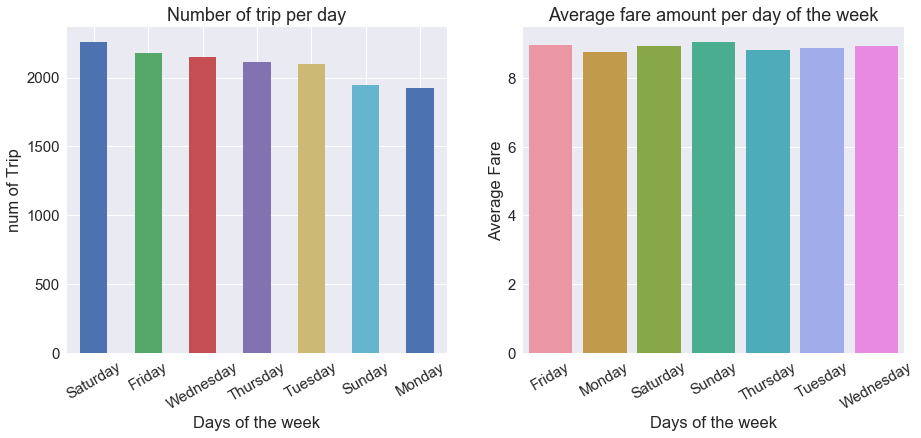

In [37]:
plt.subplot(1,2,1)
df_train.picup_day.value_counts().plot(kind= "bar", figsize= (15, 6))
plt.xlabel("Days of the week")
plt.ylabel("num of Trip")
plt.title("Number of trip per day")
plt.xticks(rotation=30)

# Plotting average fair per day
plt.subplot(1,2,2)
avg_fare_per_day= df_train.groupby(["picup_day"])["fare_amount"].mean().reset_index().rename(columns={"fare_amount": "Avg_fare"})
sns.barplot(x= "picup_day", y= "Avg_fare", data= avg_fare_per_day)
plt.xlabel("Days of the week")
plt.ylabel("Average Fare")
plt.title("Average fare amount per day of the week")
plt.xticks(rotation=30)



<font color='blue'>As We can see number of trips is bit lower on sunday and monday, not much difference can be seen on average fare amount throughout the week</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

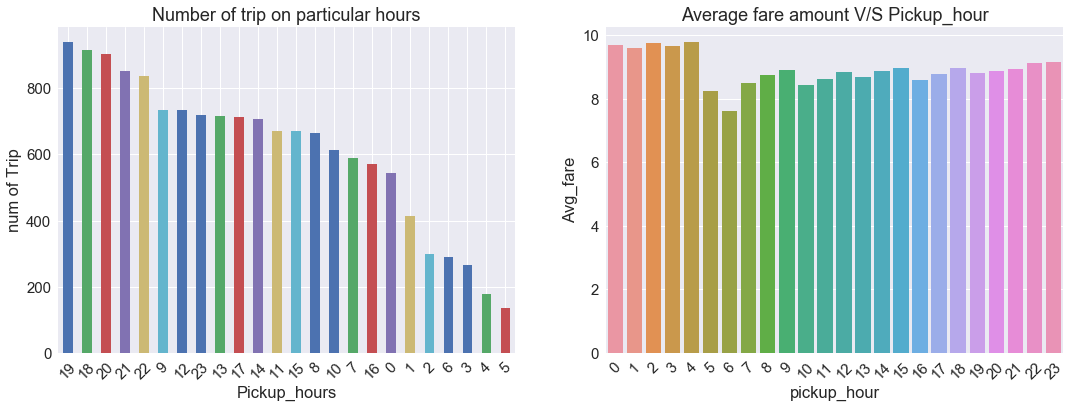

In [38]:
plt.subplot(1, 2,1)
df_train.pickup_hour.value_counts().plot(kind= "bar", figsize= (18, 6))
plt.xlabel("Pickup_hours")
plt.ylabel("num of Trip")
plt.title("Number of trip on particular hours")
plt.xticks(rotation=45)



# Plotting average fair on particular time
plt.subplot(1,2,2)
avg_fare_by_picTime= df_train.groupby(["pickup_hour"])["fare_amount"].mean().reset_index().rename(columns={"fare_amount": "Avg_fare"})
sns.barplot(x= "pickup_hour", y= "Avg_fare", data= avg_fare_by_picTime)
plt.title("Average fare amount V/S Pickup_hour")
plt.xticks(rotation=45)




In [39]:
df_train[df_train.pickup_longitude==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_day,picup_day,pickup_month,pickup_hour
11,5.5,2012-12-24 11:24:00,0.0,0.0,0.000000,0.000000,3.0,2012,24,Monday,12,11
15,5.0,2013-11-23 12:57:00,0.0,0.0,0.000000,0.000000,1.0,2013,23,Saturday,11,12
26,8.5,2011-02-07 20:01:00,0.0,0.0,0.000000,0.000000,1.0,2011,7,Monday,2,20
124,8.0,2013-01-17 17:22:00,0.0,0.0,0.000000,0.000000,2.0,2013,17,Thursday,1,17
192,3.7,2010-09-05 17:08:00,0.0,0.0,0.000000,0.000000,5.0,2010,5,Sunday,9,17
233,8.5,2011-07-24 01:14:35,0.0,0.0,0.000000,0.000000,236.0,2011,24,Sunday,7,1
273,8.1,2009-10-30 18:13:00,0.0,0.0,0.000000,0.000000,4.0,2009,30,Friday,10,18
357,8.5,2013-07-04 16:41:27,0.0,0.0,0.000000,0.000000,1.0,2013,4,Thursday,7,16
376,2.5,2014-05-29 05:57:22,0.0,0.0,0.000000,0.000000,1.0,2014,29,Thursday,5,5
387,13.0,2012-11-15 08:39:00,0.0,0.0,0.000000,0.000000,1.0,2012,15,Thursday,11,8


In [40]:
# lets check the pickup lattitude and drop longitude
df_train['pickup_latitude'].min(), df_train['dropoff_latitude'].max() #(40.69747, 40.809018)

#df_test['pickup_latitude'].min(), df_test['dropoff_latitude'].max()   #(40.573143, 41.696683)

(-74.006893, 41.366138)

## Given data is of Newyork city whose lat, long range is [((40,-74)] so train data having some outliers locations

In [41]:
Actual_boundary={'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

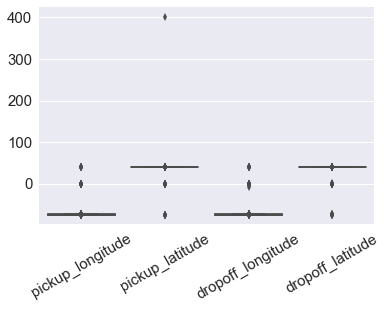

In [42]:
loc_data= df_train.loc[:, ["pickup_longitude", 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
sns.boxplot(data=loc_data)
plt.xticks(rotation=30)

In [43]:
for i in loc_data:
    print(i)

    
    q75, q25= np.percentile(df_train.loc[:, i], [75, 25])
    print(q75, q25)
    iqr= q75- q25
    min= q25- iqr*1.5
    max= q75+ iqr*1.5
    print(min, max)
    df_train= df_train.drop(df_train[df_train.loc[:, i] < min].index)
    df_train= df_train.drop(df_train[df_train.loc[:, i] > max].index)   

pickup_longitude
-73.96863292 -73.9924305
-74.02812687 -73.93293655000002
pickup_latitude
40.766877 40.737493
40.693417 40.810953
dropoff_longitude
-73.96919547 -73.99185
-74.02583179499999 -73.935213675
dropoff_latitude
40.7674215 40.738088000000005
40.694087750000016 40.81142174999999


### Plotting Dropoff lng, lat

(-74.03, -73.75)

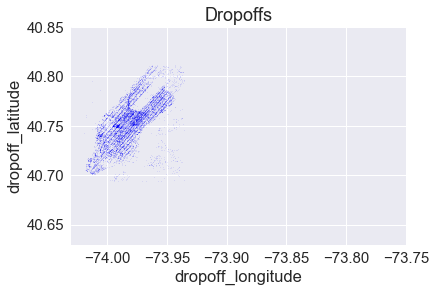

In [44]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
df_train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='blue', 
                s=.02, alpha=.5)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

### PLotting pickup long, lat

(-74.03, -73.75)

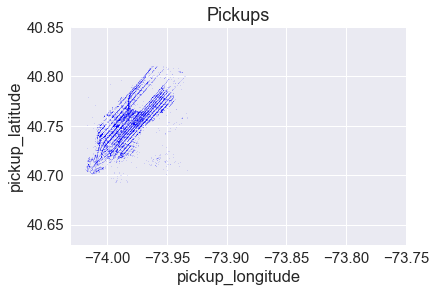

In [45]:
df_train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.02, alpha=.8)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

##### we can see heavy pickups and dropoffs near Manhattan

In [46]:
# Lest Check average rate based on lon and lat

pickup_fare_amount=df_train.groupby(['pickup_latitude','pickup_longitude'])[['fare_amount']].mean().sort_values(by= "fare_amount", ascending= False).reset_index().rename(columns={'fare_amount':'avg_fare'})
pickup_fare_amount.head(10)

,pickup_latitude,pickup_longitude,avg_fare
0,40.725333,-73.992632,22.1
1,40.741827,-73.998093,22.1
2,40.795269,-73.971602,22.1
3,40.708689,-74.013310,22.0
4,40.780200,-73.946890,22.0
5,40.803161,-73.956374,22.0
6,40.792220,-73.975570,22.0
7,40.778047,-73.954582,22.0
8,40.765630,-73.954680,22.0
9,40.779080,-73.962278,22.0


### Calculating Distance between two places

In [47]:


from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # 6371 is Radius of earth in kilometers. Use 3956 for miles
    return km

df_train['distance'] = haversine_np(df_train['pickup_latitude'], df_train['pickup_longitude'], df_train['dropoff_latitude'] , df_train['dropoff_longitude'])


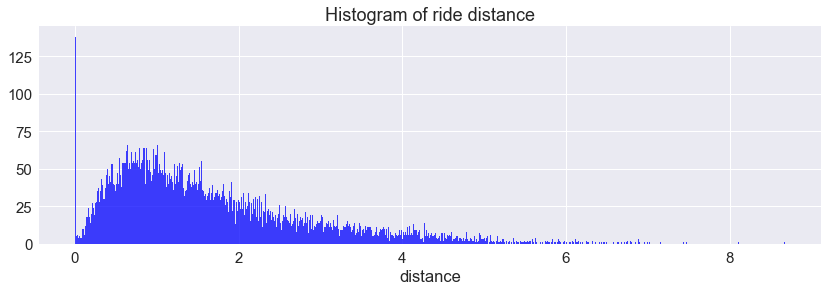

In [48]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(df_train.distance, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('distance')
plt.title('Histogram of ride distance')
plt.show();

In [49]:
df_train['distance'].describe()

count    13286.000000
mean         1.679076
std          1.217135
min          0.000000
25%          0.781320
50%          1.368313
75%          2.275029
max          8.676482
Name: distance, dtype: float64

### PLotting Relationship between trip distance and fair amount

Text(0.5,1,'Trip Distance vs Fare Amount')

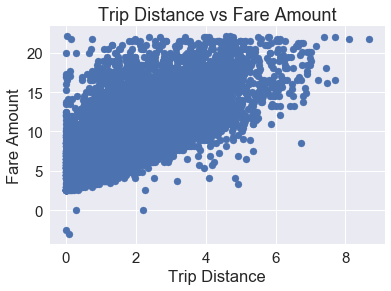

In [50]:
plt.scatter(x=df_train['distance'],y=df_train['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

###### Fare Amount increases with increase in Trip distance

In [51]:
# Distance contain some zero value we will remove that frpm the dataset
df_train = df_train.loc[df_train['distance'] > 0]

In [52]:
JFK_coord = (40.6413, -73.7781)
pickup_JFK = haversine_np(df_train['pickup_latitude'], df_train['pickup_longitude'], JFK_coord[0], JFK_coord[1]) 
dropoff_JFK = haversine_np(JFK_coord[0], JFK_coord[1], df_train['dropoff_latitude'], df_train['dropoff_longitude'])
df_train['JFK_distance'] = pd.concat([pickup_JFK, dropoff_JFK], axis=1).min(axis=1)
del df_train['pickup_datetime']
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_day,picup_day,pickup_month,pickup_hour,distance,JFK_distance
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,5,Tuesday,1,16,4.628504,22.786805
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,18,Thursday,8,0,1.001022,23.054156
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,21,Saturday,4,4,0.910440,23.415331
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,9,Tuesday,3,7,1.361021,20.336452
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1.0,2011,6,Thursday,1,9,3.226363,21.958824


## MODELING
  

In [53]:
# Assign label to categorical variable pickUp_day

df_train.picup_day = pd.Categorical(df_train.picup_day)
df_train.picup_day = df_train.picup_day.cat.codes
df_train.picup_day = df_train.picup_day.astype('object')

##### SPlit Data into Train and Test

In [54]:
# Split data
y = df_train['fare_amount']
X = df_train.drop(columns=['fare_amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9222, 12) (9222,) (3953, 12) (3953,)


##### Calculate fare rate per km

In [57]:
rate = df_train['fare_amount'].mean() / estimate_distance(df_train).mean()
print("Rate = ${0}/km".format(rate))

## Linear Regression
##### Fit and predict model

In [ ]:
X_train= X_train.values
X_test = X_test.values

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=np.round(lm.predict(X_test),2)
lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lm_train_rmse=np.sqrt(mean_squared_error(lm.predict(X_train), y_train))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

In [ ]:
style.use("bmh")
plt.scatter(lm.predict(X_test), y_test) #plot the predicted x_test and y_test values.






## Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
Rf_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
Rf_train_rmse=np.sqrt(mean_squared_error(rf.predict(X_train), y_train))
Rf_variance=abs(Rf_train_rmse - Rf_rmse)
print("Test RMSE for Random Forest is ",Rf_rmse)
print("Train RMSE for Random Forest is ",Rf_train_rmse)
print("Variance for Random Forest is ",Rf_variance)

## Regression tree

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)

tree_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
tree_train_rmse=np.sqrt(mean_squared_error(regr_1.predict(X_train), y_train))
tree_variance=abs(tree_train_rmse - tree_rmse)
print("Test RMSE of tree is ",tree_rmse)
print("Train RMSE for tree is ",tree_train_rmse)
print("Variance for tree is ",tree_variance)